# Predicting Fetal Health Classification:
> In this work, we use machine learning for the prediction of fetal health to prevent child and maternal mortality.
* **Gradient Boosting Classifier (GBC)**: is another ensemble method combining a series of weak learners to obtain a stronger predictor.



## Import Necessary Libraries and Data Sets.

In [48]:
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Algorithms
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

In [49]:
data = pd.read_csv('fetal_health.csv')

In [50]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [51]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [52]:
print(f"The dataset size: {data.shape}")

The dataset size: (2126, 22)


## Analyze and visualize the target column (fetal_health)

We use the **describe() method** for our target column to show the descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.

In [53]:
data["fetal_health"].describe()

count    2126.000000
mean        1.304327
std         0.614377
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: fetal_health, dtype: float64

Data visualizations of **"fetal_health"** column makes easier to understand the fetal state, and visualization also makes it easier to detect patterns of the fetal state (Normal, Suspect, Pathological).

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


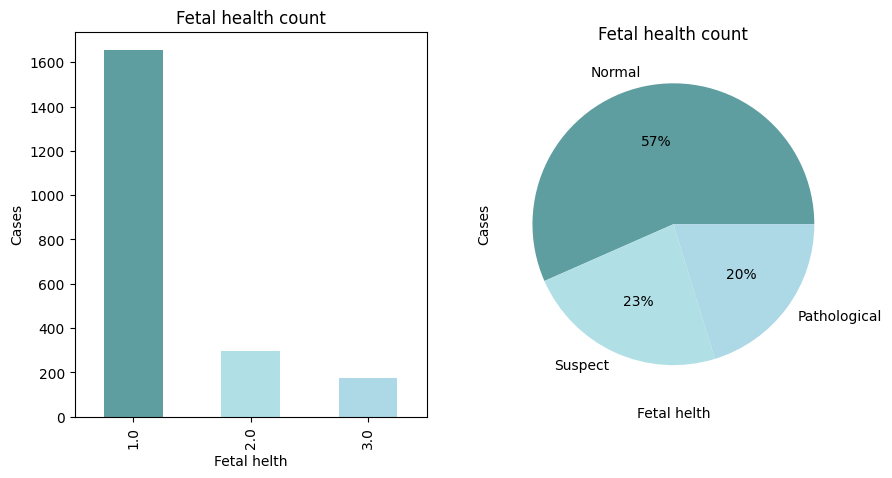

In [54]:
total = data["fetal_health"].sum()
normal = total - 471
suspect = total - 1831
pathological = total - 1950

print(data["fetal_health"].value_counts())

plt.figure(figsize = (10,5))
plt.subplot(121)
# sns.countplot(x="fetal_health", data=data)
vis_fetal_health = data.fetal_health.value_counts().plot(figsize=(10, 5), kind="bar", color = ["#5F9EA0", "#B0E0E6", "#ADD8E6"])
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")


plt.subplot(122)
# plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], autopct="%1.0f%%")
plt.title("Fetal state")

vis_pie_fetal_health = plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], colors = ["#5F9EA0", "#B0E0E6", "#ADD8E6"], autopct="%1.0f%%")
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")


plt.show()

Data visualizations of "fetal_health" column shows us the percentage of fetal health state.

# Scaling the data
> Feature scaling in machine learning is one of the most critical steps during the pre-processing of data before creating a machine learning model. Scaling can make a difference between a weak machine learning model and a better one. The most common techniques of feature scaling are Normalization and Standardization. Normalization is used when we want to bound our values between two numbers, typically, between [0,1] or [-1,1]. While Standardization transforms the data to have zero mean and a variance of 1, they make our data unitless. Refer to the below diagram, which shows how data looks after scaling in the X-Y plane.


In [22]:
columns = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']
scale_X = StandardScaler()
X =  pd.DataFrame(scale_X.fit_transform(data.drop(["fetal_health"],axis = 1),), columns = columns)

In [24]:
X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352220,-0.822388,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,...,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980
1,-0.132526,0.730133,-0.20321,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526
2,-0.030884,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526
3,0.070757,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980
4,-0.132526,0.988886,-0.20321,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980


In [25]:
y = data["fetal_health"]

## Test Train Split and Cross Validation methods
* **Train Test Split** : To have unknown datapoints to test the data rather than testing with the same points with which the model was trained. This helps capture the model performance much better.
* **Cross-validation**, sometimes called rotation estimation or out-of-sample testing, is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set.


In [26]:
# Importing train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1488, 21), (638, 21), (1488,), (638,))

## Gradient Boosting classifier (GBC)


In [28]:
# Baseline model of gradient boosting classifier with default parameters:
gbc = GradientBoostingClassifier()
gbc_mod = gbc.fit(X_train, y_train)
print(f"Baseline gradient boosting classifier: {round(gbc_mod.score(X_test, y_test), 3)}")

pred_gbc = gbc_mod.predict(X_test)

Baseline gradient boosting classifier: 0.934


In [31]:
# Cross validate Gradient Boosting Classifier model
scores_GBC = cross_val_score(gbc, X_train, y_train, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for Gradient Boosting Classifier model:\n{scores_GBC}")
print(f"CrossValMeans: {round(scores_GBC.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_GBC.std(), 3)}")

Scores(Cross validate) for Gradient Boosting Classifier model:
[0.94966443 0.96308725 0.9261745  0.95622896 0.94276094]
CrossValMeans: 0.948
CrossValStandard Deviation: 0.013


## Tuning parameters
Many strategies exist on how to tune parameters. Most data scientist see **number of trees, tree depth and the learning rate** as most crucial parameters.
* **Number of trees**: A high number of trees can be computationally expensive. Generally, with a change in learning rate,n_estimators should also be adjusted (10-fold decrease in learning_rate should go in line with a approx. 10-fold increase in n_estimators.
* **Learning rate**: Determines the contribution of each tree on the final outcome and controls how quickly the algorithm proceeds down the gradient descent (learns). This hyperparameter is also called shrinkage. Generally, the smaller this value, the more accurate the model can be but also will require more trees in the sequence.
* **Tree depth**: Controls the depth of the individual trees. Typical values range from a depth of 3–8 but it is not uncommon to see a tree depth of 1.

Parameter tuning is a crucial task in finding the model with the highest predictive power. The code below how to tune parameters in a gradient boosting model for classification.

It's hyperparameter tuning time. First, we need to define a dictionary of GBC parameters for the grid search.

In [32]:
params_GBC = {"loss": ["deviance"],
              "learning_rate": [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
              "n_estimators": [250, 500],
              "max_depth": [3, 5, 8]
              }

Second, we pass the GradientBoostingClassifier() and params_GBC as the model and the parameter dictionary into the GridSearchCV function.


In [34]:
GridSearchCV_GBC = GridSearchCV(estimator=GradientBoostingClassifier(),
                                param_grid=params_GBC,
                                verbose=1,
                                n_jobs=2,
                                scoring="accuracy",
                                return_train_score=True
                                )

In [35]:
# Fit model with train data
GridSearchCV_GBC.fit(X_train, y_train);

Fitting 5 folds for each of 42 candidates, totalling 210 fits


In [36]:
# Get the best estimator values.
best_estimator_GBC = GridSearchCV_GBC.best_estimator_
print(f"Best estimator values for GBC model:\n{best_estimator_GBC}")

Best estimator values for GBC model:
GradientBoostingClassifier(learning_rate=0.5, loss='deviance', n_estimators=500)


In [37]:
# Get the best parameter values.
best_params_GBC = GridSearchCV_GBC.best_params_
print(f"Best parameter values for GBC model:\n{best_params_GBC}")

Best parameter values for GBC model:
{'learning_rate': 0.5, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 500}


In [38]:
# Best score for GBC by using the best_score attribute.
best_score_GBC = GridSearchCV_GBC.best_score_
print(f"Best score value foe GBC model: {round(best_score_GBC, 3)}")

Best score value foe GBC model: 0.952


In [39]:
# Test with new parameter for GBC model
gbc = GradientBoostingClassifier(criterion="friedman_mse", learning_rate=1, loss="deviance", max_depth=5, max_features="log2", min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=200, random_state=42)
gbc_mod = gbc.fit(X_train, y_train)
pred_gbc = gbc_mod.predict(X_test)

mse_gbc = mean_squared_error(y_test, pred_gbc)
rmse_gbc = np.sqrt(mean_squared_error(y_test, pred_gbc))
score_gbc_train = gbc_mod.score(X_train, y_train)
score_gbc_test = gbc_mod.score(X_test, y_test)

In [40]:
print(f"Mean Square Error for Gradient Boosting Classifier = {round(mse_gbc, 3)}")
print(f"Root Mean Square Error for Gradient Boosting Classifier = {round(rmse_gbc, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_gbc_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_gbc_test, 3)}")

Mean Square Error for Gradient Boosting Classifier = 0.149
Root Mean Square Error for Gradient Boosting Classifier = 0.386
R^2(coefficient of determination) on training set = 0.998
R^2(coefficient of determination) on testing set = 0.898


In [41]:
print("Classification Report")
print(classification_report(y_test, pred_gbc))

Classification Report
              precision    recall  f1-score   support

         1.0       0.95      0.96      0.95       497
         2.0       0.69      0.69      0.69        88
         3.0       0.78      0.68      0.73        53

    accuracy                           0.90       638
   macro avg       0.80      0.78      0.79       638
weighted avg       0.90      0.90      0.90       638



In [42]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_gbc))

Confusion Matrix:
[[476  15   6]
 [ 23  61   4]
 [  4  13  36]]


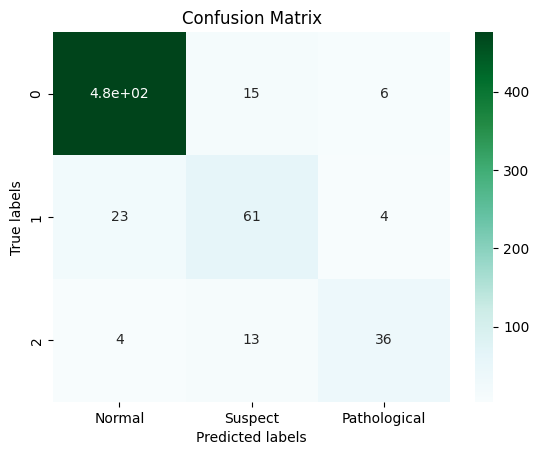

In [43]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_gbc), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels");
ax.set_title("Confusion Matrix");
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);